# Consumer Complaint Analysis##

Importing required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

Loading the data

In [54]:
data = pd.read_csv('Consumer_Complaints.csv')

/home/user/venv1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### TASK-1: Plot a histogram for "Product"#

Grouping on product, then counting Complaint ID's and plotting

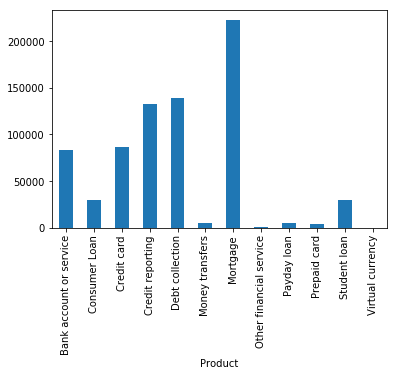

In [3]:
data.groupby('Product')['Complaint ID'].agg('count').plot(kind='bar')

### TASK-2:Filter the Complaints for the period 2013 to 2015, and plot histogram for "Product"##

Converting the type of Date received to datetime for comparision

In [52]:
data['Date received'] = pd.to_datetime(data['Date received'])

Converting Interval of time required to datetime

In [ ]:
ts1 = pd.to_datetime('1/1/2013')
ts2 = pd.to_datetime('31/12/2015')

Filtering the data

In [ ]:
filtered_data = data.loc[(data['Date received'] >= ts1) & (data['Date received'] <= ts2)]

Grouping on product, then counting Complaint ID and plotting

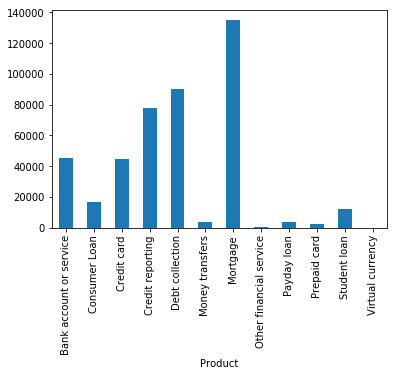

In [49]:
filtered_data.groupby('Product')['Complaint ID'].agg('count').plot(kind = 'bar')

### TASK-3:Plot the aggregated Number of "Complaint ID" first by State followed by Company

Counting the complaints of each company in each state

In [13]:
state_Complaint = data.groupby(['State','Company'])['Complaint ID'].agg('count')

Sorting on number of compalints and taking the top 100 companies

In [37]:
top_complaints = state_Complaint.sort_values(ascending = False)[0:100]


Converting Series to Dataframe and filling Nan with Zero

In [57]:
df = top_complaints.unstack(level=-1, fill_value=0)

Sample Plot of the DF by taking 20 rows and 30 columns

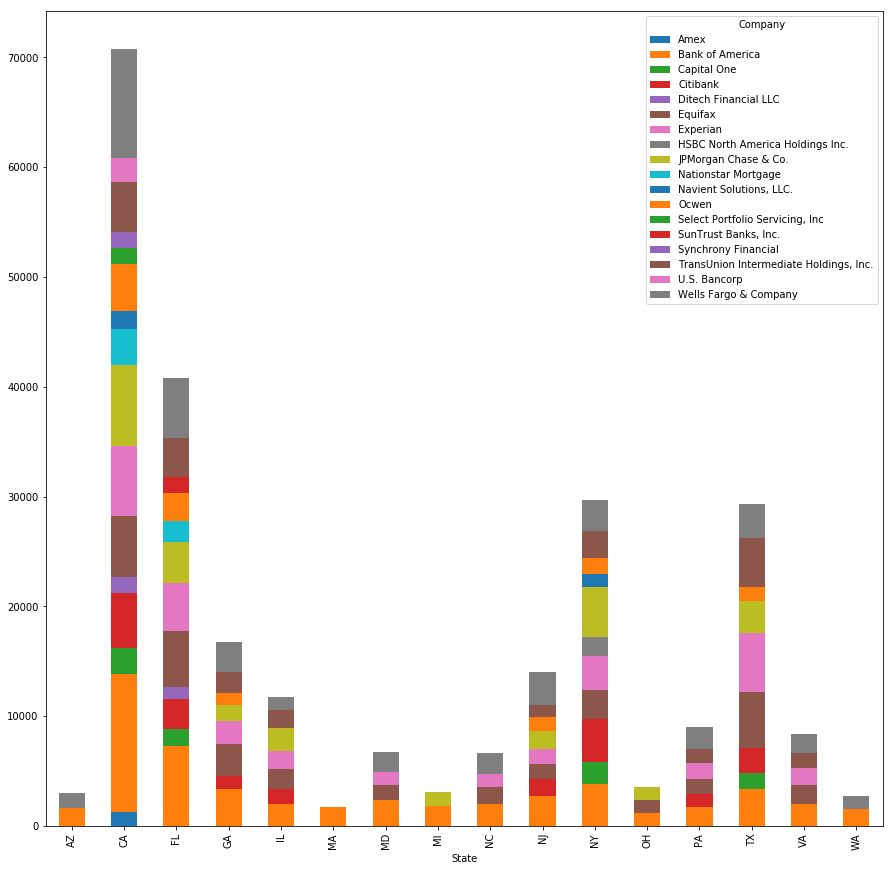

In [40]:
df.plot(kind = 'bar',stacked = True,figsize = (15,15));